In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("car.xlsx")

In [3]:
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


C:\Users\win10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AnnualSalary', ylabel='Density'>

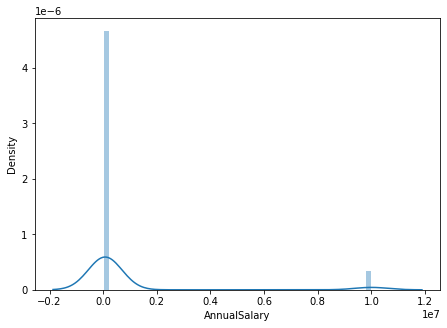

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['AnnualSalary'])

C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AnnualSalary'>

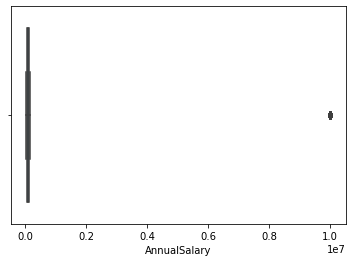

In [6]:
sns.boxplot(df['AnnualSalary'])

In [7]:
percential25 = df['AnnualSalary'].quantile(0.25)
percential75 = df['AnnualSalary'].quantile(0.75)

In [8]:
percential75

104125.0

In [9]:
iqr = percential25-percential75

In [10]:
iqr

-55125.0

In [12]:
upper_limit = percential75 + 1.5 * iqr
lower_limit = percential25 - 1.5 * iqr

In [13]:
upper_limit

21437.5

In [14]:
df[df['AnnualSalary']> upper_limit ]

,User ID,Gender,Age,AnnualSalary,Purchased
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [15]:
df[df['AnnualSalary']> lower_limit ]

,User ID,Gender,Age,AnnualSalary,Purchased
6,219,Female,46,132500,1
15,54,Female,33,149000,1
19,94,Female,39,134000,1
29,994,Female,38,147500,1
59,820,Female,35,147000,1
...,...,...,...,...,...
966,611,Female,48,133500,1
969,721,Male,29,148000,1
993,476,Female,54,136500,0
997,407,Female,28,138500,1


In [ ]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)